# Audio Processing
## This notebook outlines the concepts behind the Audio signal processing

- Create Sine Wave
- Write an audio file
- Reading an audio file
- Compute frequencies in an audio file

In [5]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt

### Sound
Sound is a travelling vibration


#### 2 basic attributes
- Amplitude (loudness)
- Frequency (measure of wave's vibration per unit time)

### Sine wave
y(t) = A * sin(2 * pi * f * t)

### Amplitude
Height of the sine wave

### Frequency
Frequency is the number of times a wave repeats a second

### Sampling Rate
Sampling rate of the analog to digital conversion

### Let's create a Sine wave
- frequency = 1000
- time = 1 second
    - num_samples = 48000
    - sampling_rate = 48000

In [6]:
frequency = 1000
num_samples = 48000
sampling_rate = 48000.0
amplitude = 16000

### Sine wave

In [7]:
sine_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]

### Create a wave file to store the audio

In [8]:
wav_file=wave.open("test.wav", 'w')

### Parameters for wave file
- nframes (num_samples)
- comptype (None)
- compname (not compressed)
- nchannels (1)
- sampwidth (2)

In [9]:
nframes=num_samples
comptype="NONE"
compname="not compressed"
nchannels=1
sampwidth=2

In [10]:
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

### write the created sine wave into the wave file

In [11]:
for s in sine_wave:
    wav_file.writeframes(struct.pack('h', int(s*amplitude)))

### Reading a wave file

In [12]:
wav_file = wave.open("test.wav", 'r')

### Read the file

In [13]:
data = wav_file.readframes(num_samples)

In [14]:
data

b'\x00\x00(\x08-\x10\xea\x17?\x1f\x0c&1,\x951 6\xbe9^<\xf7=\x80>\xf7=^<\xbe9 6\x9511,\x0c&@\x1f\xea\x17-\x10(\x08\x00\x00\xd8\xf7\xd3\xef\x16\xe8\xc1\xe0\xf4\xd9\xcf\xd3k\xce\xe0\xc9B\xc6\xa2\xc3\t\xc2\x80\xc1\t\xc2\xa2\xc3B\xc6\xe0\xc9k\xce\xcf\xd3\xf4\xd9\xc0\xe0\x16\xe8\xd3\xef\xd8\xf7\x00\x00(\x08-\x10\xea\x17?\x1f\x0c&1,\x951 6\xbe9^<\xf7=\x80>\xf7=^<\xbe9 6\x9511,\x0c&?\x1f\xea\x17-\x10(\x08\x00\x00\xd8\xf7\xd3\xef\x16\xe8\xc1\xe0\xf4\xd9\xcf\xd3k\xce\xe0\xc9B\xc6\xa2\xc3\t\xc2\x80\xc1\t\xc2\xa2\xc3B\xc6\xe0\xc9k\xce\xcf\xd3\xf4\xd9\xc0\xe0\x16\xe8\xd3\xef\xd8\xf7\x00\x00(\x08-\x10\xea\x17?\x1f\x0c&1,\x951 6\xbe9^<\xf7=\x80>\xf7=^<\xbe9 6\x9511,\x0c&@\x1f\xea\x17-\x10(\x08\x00\x00\xd8\xf7\xd3\xef\x16\xe8\xc1\xe0\xf4\xd9\xcf\xd3k\xce\xe0\xc9B\xc6\xa2\xc3\t\xc2\x80\xc1\t\xc2\xa2\xc3B\xc6\xe0\xc9k\xce\xcf\xd3\xf4\xd9\xc0\xe0\x16\xe8\xd3\xef\xd8\xf7\x00\x00(\x08-\x10\xea\x17?\x1f\x0c&1,\x951 6\xbe9^<\xf7=\x80>\xf7=^<\xbe9 6\x9511,\x0c&@\x1f\xea\x17-\x10(\x08\x00\x00\xd8\xf7\xd3\xef\x

### Unpacking

In [15]:
data = struct.unpack('{n}h'.format(n=num_samples), data)

### Convert into the NumpyArray 

In [16]:
data = np.array(data)

### Fourier Transform
Split the audio signal into frequencies

In [17]:
data_fft = np.fft.fft(data)

### Get the frequencies

In [18]:
frequencies = np.abs(data_fft)

In [19]:
print("The frequency is {} Hz".format(np.argmax(frequencies)))

The frequency is 1000 Hz


### Plot the signal and frequencies

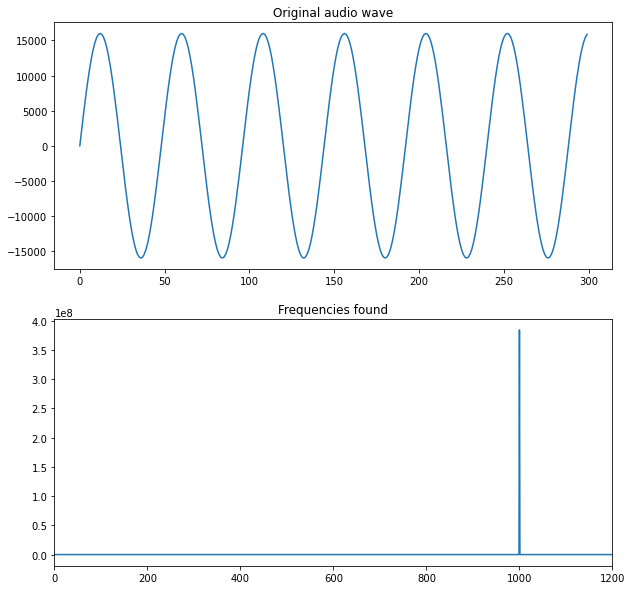

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(data[:300])
plt.title("Original audio wave")
plt.subplot(2,1,2)
plt.plot(frequencies)
plt.title("Frequencies found")
plt.xlim(0,1200)
plt.show()